In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Load the time series data
data = pd.read_csv("cleaned_data.csv")

# Split the data into features and target
X = data.drop("Total deaths", axis=1)
y = data["Total deaths"]

# Initialize the time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the random forest model
rf = RandomForestRegressor(n_estimators=100)



FileNotFoundError: ignored

In [ ]:
# Train the model using cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   

In [ ]:
  rf.fit(X_train, y_train)
    
    

In [ ]:
# Evaluate the model on the test set
test_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print("Test score:", score)

In [ ]:
#ARIMA

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


In [3]:
# Load data
data = pd.read_csv("cleaned_data.csv")

# Fit ARIMA model
model = ARIMA(data['Total deaths'].values, order=(1,1,2))
model_fit = model.fit()

print(model_fit.summary())
# Make predictions
#forecast = model_fit.forecast(steps=forecast_steps)[0]

FileNotFoundError: ignored

In [4]:
#ETS

In [7]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')


# Load data
train= pd.read_csv("cleaned_data.csv")
test=pd.read_csv("cleaned_data.csv")

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train['Total_deaths'].values)
model_fit = model.fit()


# Make predictions
#forecast = model_fit.forecast(steps=forecast_steps)

In [8]:
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                37405
Model:             ExponentialSmoothing   SSE                  2395426084539.749
Optimized:                         True   AIC                         672359.719
Trend:                             None   BIC                         672376.778
Seasonal:                          None   AICC                        672359.720
Seasonal Periods:                  None   Date:                 Tue, 07 Feb 2023
Box-Cox:                          False   Time:                         03:00:54
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              1.00000

In [9]:
train.head()

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,Asia,Afghanistan,2020-02-24,5,5,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0.0,64.83
1,Asia,Afghanistan,2020-02-25,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0.0,64.83
2,Asia,Afghanistan,2020-02-26,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0.0,64.83
3,Asia,Afghanistan,2020-02-27,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0.0,64.83
4,Asia,Afghanistan,2020-02-28,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0.0,64.83


In [10]:
df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total_Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,Total_Cases
Continent,
Africa,133054631
South America,48108630
Europe,10201296
North America,4628020
Asia,4198658
Oceania,3362037


In [11]:
train.sample(6)

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
5432,North America,Antigua and Barbuda,2021-01-08,167,4,1.143,5,0,0.000,1691.516,...,32.1,6.933,4.631,0.2,191.511,13.17,1.9,24.7,3.0,77.02
1782,Europe,Albania,2020-12-10,46061,873,794.286,965,14,16.143,16032.739,...,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2,2.0,78.57
12585,Asia,Bahrain,2022-02-05,413372,7434,7335.714,1411,1,1.000,236442.934,...,32.4,2.372,1.387,0.2,151.689,16.52,5.8,37.6,2.0,77.29
19718,North America,Bonaire Sint Eustatius and Saba,2021-10-03,2141,15,17.429,19,0,0.000,80960.484,...,32.4,6.933,3.053,0.2,152.783,2.42,1.9,24.7,0.0,77.79
18798,South America,Bolivia,2021-02-28,249010,463,959.714,11649,21,29.714,21043.805,...,25.4,6.704,4.393,7.1,204.299,6.89,1.9,24.7,1.0,71.51
3544,Europe,Andorra,2021-09-24,15167,11,6.143,130,0,0.000,196072.601,...,32.4,6.933,3.053,0.2,109.135,7.97,29.0,37.8,0.0,83.73


In [ ]:
test.sample(6)

In [12]:



df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total_Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,Total_Cases
Continent,
Africa,133054631
South America,48108630
Europe,10201296
North America,4628020
Asia,4198658
Oceania,3362037


In [13]:
fig = px.bar(top10, x=top10.index, y='Total_Cases', labels={'x':'Continent'},
             color="Total_Cases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Total COVID-19 cases by Continent')
fig.show()

From the above graph, we can say that Africa has most Total cases and followed by Europe. The virus has began at China but virus is showing a greater impact on Africa and Europe and Asia

In [14]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total_Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Africa') &(df_by_date.Date >= '2020-03-01')].sort_values('Total_Cases',ascending = False), 
             x='Date', y='Total_Cases', color="Total_Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Africa')
fig.show()

In [18]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total_Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Europe') &(df_by_date.Date >= '2020-03-01')].sort_values('Total_Cases',ascending = False), 
             x='Date', y='Total_Cases', color="Total_Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Europe')
fig.show()

In [16]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
4642,2022-03-05,Asia,4198658,7742,9455.714,64008,48,52.714,754118.953,10707.530,...,271.9,51.830,31.101,19.8,2898.685,84.99,18.3,339.3,17.0,657.17
4643,2022-03-05,Europe,10201296,36077,34554.428,121948,84,125.000,1846310.691,4233.300,...,328.1,129.787,85.117,4.8,2124.645,55.35,194.7,329.4,40.0,631.20
4644,2022-03-05,North America,4383106,2884,6452.142,47410,44,68.000,2190825.675,653.796,...,409.4,108.936,60.791,3.8,1921.506,129.52,38.6,266.5,14.0,949.00
4645,2022-03-05,Oceania,3362037,17376,24845.429,5417,14,37.000,130484.792,673.796,...,70.3,22.437,13.182,0.7,260.574,7.49,14.9,41.2,3.0,159.69
4646,2022-03-05,South America,48108630,89621,70862.714,982371,979,721.715,690536.171,1531.149,...,158.4,45.187,28.144,16.9,825.525,36.40,67.1,125.3,11.0,381.53


In [ ]:
###Time Evaluation

In [19]:
df.head()

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,2020-01-01,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
1,2020-01-02,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
2,2020-01-03,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
3,2020-01-04,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
4,2020-01-05,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67


In [21]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
4642,2022-03-05,Asia,4198658,7742,9455.714,64008,48,52.714,754118.953,10707.530,...,271.9,51.830,31.101,19.8,2898.685,84.99,18.3,339.3,17.0,657.17
4643,2022-03-05,Europe,10201296,36077,34554.428,121948,84,125.000,1846310.691,4233.300,...,328.1,129.787,85.117,4.8,2124.645,55.35,194.7,329.4,40.0,631.20
4644,2022-03-05,North America,4383106,2884,6452.142,47410,44,68.000,2190825.675,653.796,...,409.4,108.936,60.791,3.8,1921.506,129.52,38.6,266.5,14.0,949.00
4645,2022-03-05,Oceania,3362037,17376,24845.429,5417,14,37.000,130484.792,673.796,...,70.3,22.437,13.182,0.7,260.574,7.49,14.9,41.2,3.0,159.69
4646,2022-03-05,South America,48108630,89621,70862.714,982371,979,721.715,690536.171,1531.149,...,158.4,45.187,28.144,16.9,825.525,36.40,67.1,125.3,11.0,381.53


In [37]:
def pltCountry_cases(Total_Cases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Continent']==a)]
        plt.plot(country['Date'],country['Total_Cases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )

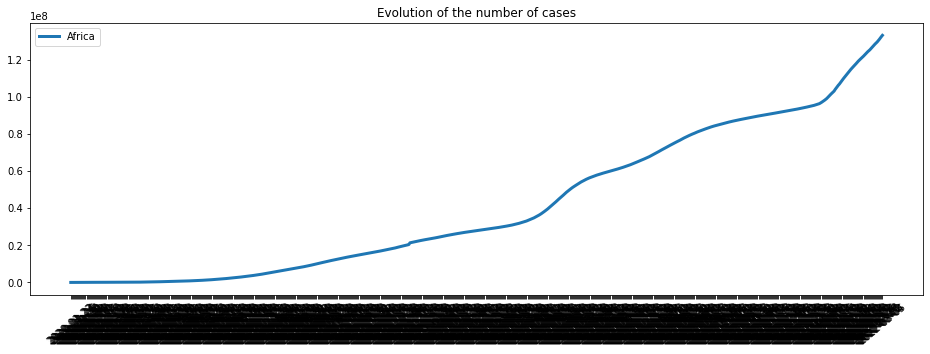

In [38]:
pltCountry_cases('Total_Cases','Africa')


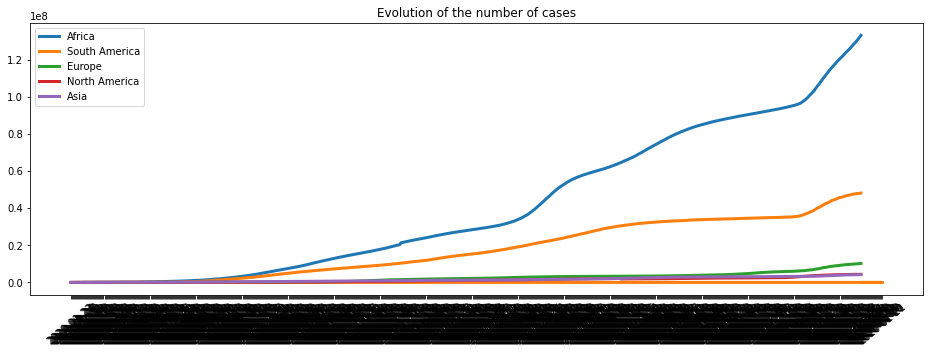

In [39]:
pltCountry_cases('Total_Cases','Africa','South America', 'Europe', 'North America', 'Asia')



In [41]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Total_Cases'):
    ts=df.loc[(df['Continent']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Total_Cases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Total_Cases'):
    ts=df.loc[(df['Continent']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Total_Cases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

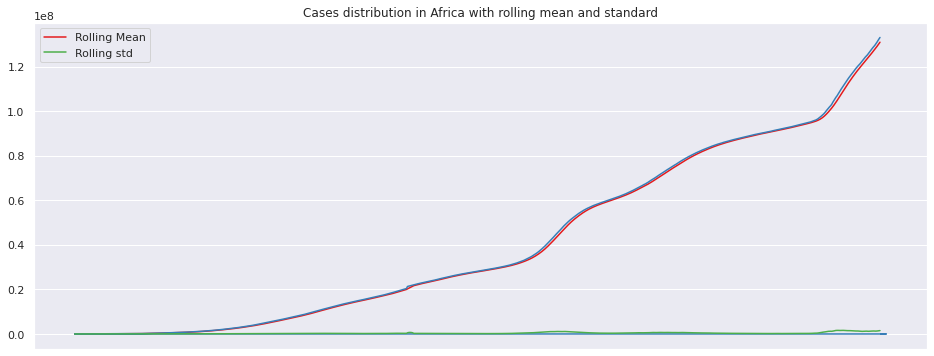

In [42]:
tsC1=roll('Africa')
rollPlot('Africa')

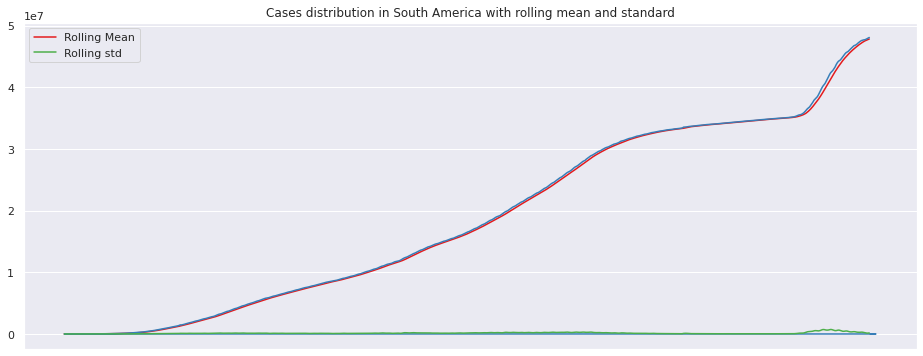

In [43]:
tsC2=roll('South America')
rollPlot('South America')

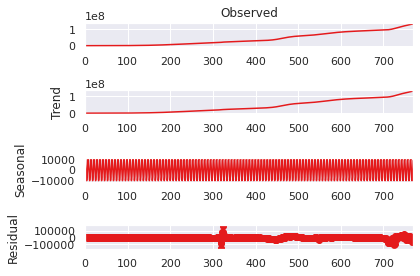

In [44]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

In [45]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['Total_Cases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                   2.535009
p-value                          0.999060
#Lags Used                      17.000000
Number of Observations Used    753.000000
Critical Value (1%)             -3.439064
Critical Value (5%)             -2.865386
Critical Value (10%)            -2.568818
dtype: float64


In [47]:
#For Africa
tsC=tsC2['Total_Cases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                   1.315765
p-value                          0.996696
#Lags Used                      19.000000
Number of Observations Used    712.000000
Critical Value (1%)             -3.439568
Critical Value (5%)             -2.865608
Critical Value (10%)            -2.568936
dtype: float64


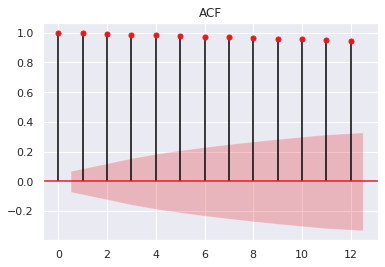

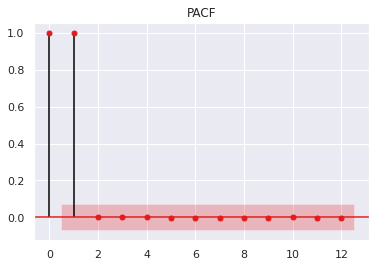

In [48]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For Africa
corr(tsC1)

In [49]:
#test['Date'] = pd.to_datetime(test['Date'])
#train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [50]:
def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [51]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

AttributeError: ignored

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  620
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -5855.560
Method:                       css-mle   S.D. of innovations           3009.541
Date:                Tue, 07 Feb 2023   AIC                          11733.119
Time:                        04:06:18   BIC                          11781.846
Sample:                             2   HQIC                         11752.060
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8321    210.191      0.113      0.910    -388.134     435.798
ar.L1.D2.y     0.6679      0.039     16.936      0.000       0.591       0.745
ar.L2.D2.y    -0.7476      0.046    -16.427      0.0

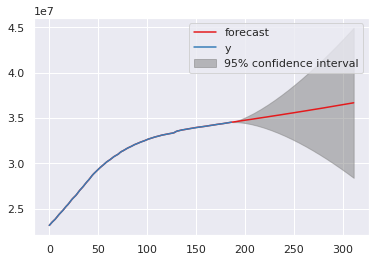

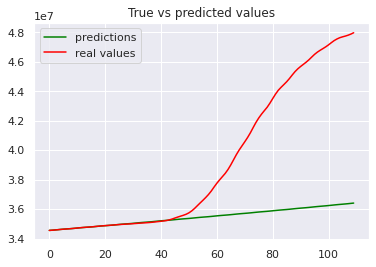

In [52]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  620
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -5855.560
Method:                       css-mle   S.D. of innovations           3009.541
Date:                Tue, 07 Feb 2023   AIC                          11733.119
Time:                        04:08:48   BIC                          11781.846
Sample:                             2   HQIC                         11752.060
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8321    210.191      0.113      0.910    -388.134     435.798
ar.L1.D2.y     0.6679      0.039     16.936      0.000       0.591       0.745
ar.L2.D2.y    -0.7476      0.046    -16.427      0.0

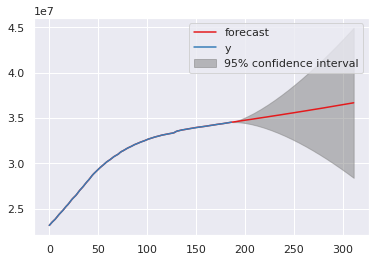

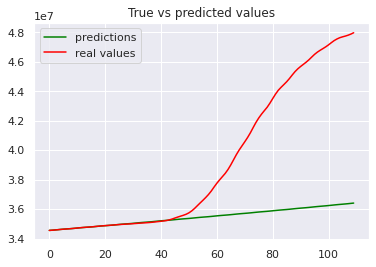

In [53]:
#Mean absolute percentage error
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)